<a href="https://colab.research.google.com/github/Pomoirab/ML/blob/main/regression_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [ ]:
train = pd.read_csv('drive/My Drive/University of Bradford/Teaching/Artificial Intelligence Module/Supervised Learning/salary_train.csv')
test = pd.read_csv('drive/My Drive/University of Bradford/Teaching/Artificial Intelligence Module/Supervised Learning/salary_test.csv')


In [ ]:
train.head()

,experience,education_years,has_car,programmer,willing_to_travel,communication_skills,knows_french,sixsigma,bradford_degree,height,weight,salary
0,10,4,1,0,1,5,1,5,1,188,78,18226
1,10,1,0,1,0,1,0,2,0,177,66,13976
2,1,5,0,0,0,2,1,1,0,196,87,6111
3,3,3,0,0,0,1,0,6,0,195,96,8506
4,11,3,0,1,1,3,1,2,0,196,74,17026


In [ ]:
test.head()

,experience,education_years,has_car,programmer,willing_to_travel,communication_skills,knows_french,sixsigma,bradford_degree,height,weight,salary
0,15,3,0,1,1,5,0,2,0,174,112,20664
1,13,4,1,0,0,5,0,2,0,180,73,19110
2,9,6,1,1,0,2,0,3,1,170,117,16319
3,12,3,0,1,0,4,1,0,1,188,106,17420
4,13,0,1,0,0,5,0,6,0,171,81,18810


In [ ]:
train.describe()

,experience,education_years,has_car,programmer,willing_to_travel,communication_skills,knows_french,sixsigma,bradford_degree,height,weight,salary
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,8.074642,3.007664,0.502832,0.497501,0.504165,2.513829,0.514162,3.492502,0.502499,184.387537,92.098301,14153.489170
std,4.279068,2.003732,0.500075,0.500077,0.500066,1.694272,0.499883,2.312580,0.500077,8.745061,16.025313,4481.753121
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,65.000000,3896.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,177.000000,78.000000,10531.000000
50%,8.000000,3.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,184.000000,92.000000,14141.000000
75%,12.000000,5.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000,1.000000,192.000000,106.000000,17926.000000
max,15.000000,6.000000,1.000000,1.000000,1.000000,5.000000,1.000000,7.000000,1.000000,199.000000,119.000000,24436.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   experience            3001 non-null   int64
 1   education_years       3001 non-null   int64
 2   has_car               3001 non-null   int64
 3   programmer            3001 non-null   int64
 4   willing_to_travel     3001 non-null   int64
 5   communication_skills  3001 non-null   int64
 6   knows_french          3001 non-null   int64
 7   sixsigma              3001 non-null   int64
 8   bradford_degree       3001 non-null   int64
 9   height                3001 non-null   int64
 10  weight                3001 non-null   int64
 11  salary                3001 non-null   int64
dtypes: int64(12)
memory usage: 281.5 KB


In [ ]:
train['experience'].describe()

count    3001.000000
mean        8.074642
std         4.279068
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: experience, dtype: float64

In [ ]:
#exp.describe()

In [ ]:
test.describe()

,experience,education_years,has_car,programmer,willing_to_travel,communication_skills,knows_french,sixsigma,bradford_degree,height,weight,salary
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,8.017982,3.158841,0.511489,0.473526,0.50050,2.534466,0.471528,3.458541,0.491508,184.613387,92.576424,14579.418581
std,4.294843,1.988905,0.500118,0.499548,0.50025,1.703837,0.499438,2.331637,0.500178,8.643922,15.661430,4191.882160
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,170.000000,65.000000,4201.000000
25%,4.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,177.000000,80.000000,11145.000000
50%,8.000000,3.000000,1.000000,0.000000,1.00000,3.000000,0.000000,3.000000,0.000000,185.000000,92.000000,14479.000000
75%,12.000000,5.000000,1.000000,1.000000,1.00000,4.000000,1.000000,6.000000,1.000000,192.000000,106.000000,18040.000000
max,15.000000,6.000000,1.000000,1.000000,1.00000,5.000000,1.000000,7.000000,1.000000,199.000000,119.000000,24036.000000


In [ ]:
train_X = train.drop('salary', axis=1)
test_X = test.drop('salary', axis=1)
train_Y = train['salary']
test_Y = test['salary']

In [ ]:
train_X.head()

,experience,education_years,has_car,programmer,willing_to_travel,communication_skills,knows_french,sixsigma,bradford_degree,height,weight
0,10,4,1,0,1,5,1,5,1,188,78
1,10,1,0,1,0,1,0,2,0,177,66
2,1,5,0,0,0,2,1,1,0,196,87
3,3,3,0,0,0,1,0,6,0,195,96
4,11,3,0,1,1,3,1,2,0,196,74


In [ ]:
train_Y

0       18226
1       13976
2        6111
3        8506
4       17026
        ...  
2996     8266
2997    23461
2998    16831
2999    11986
3000     9311
Name: salary, Length: 3001, dtype: int64

In [ ]:
# Now we are ready to do regression. We want to predict the salary.

In [ ]:
# Let's build a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [ ]:
reg

LinearRegression()

In [ ]:
# use the linear regression model to predict
predicted = reg.predict(test_X)

In [ ]:
predicted

array([21016., 19171., 16251., ...,  9076.,  6656., 21721.])

In [ ]:
print(reg.score(train_X, train_Y))

1.0


In [ ]:
print(mean_absolute_error(test_Y, predicted))

535.4775224775236


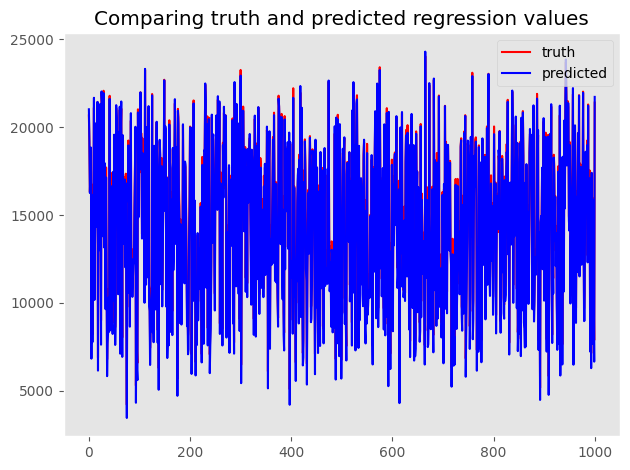

In [ ]:
make_plot(test_Y, predicted)

In [ ]:
# Now let's do random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(rf_reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, rf_predicted))

0.998157033450505
641.8387112887114


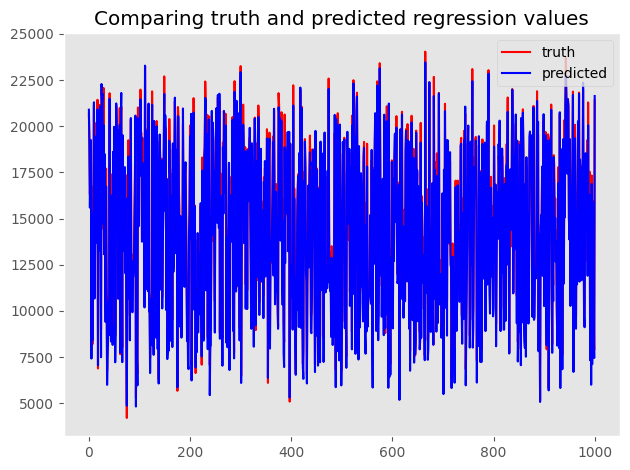

In [ ]:
make_plot(test_Y, rf_predicted)

In [ ]:
rf_reg.feature_importances_

array([9.07493447e-01, 2.97904749e-02, 1.87079066e-03, 3.47821975e-03,
       9.92768770e-04, 1.17532980e-02, 7.92530202e-04, 3.51160065e-02,
       1.45757409e-03, 3.63501363e-03, 3.61987652e-03])

In [ ]:
train.columns

Index(['experience', 'education_years', 'has_car', 'programmer',
       'willing_to_travel', 'communication_skills', 'knows_french', 'sixsigma',
       'bradford_degree', 'height', 'weight', 'salary'],
      dtype='object')

In [ ]:
imp_scores = zip(rf_reg.feature_importances_, train.columns)
sorted(list(imp_scores), reverse=True)

[(0.9074934469963081, 'experience'),
 (0.03511600653019658, 'sixsigma'),
 (0.029790474867095216, 'education_years'),
 (0.011753297990114616, 'communication_skills'),
 (0.0036350136250153315, 'height'),
 (0.003619876516724061, 'weight'),
 (0.0034782197524691003, 'programmer'),
 (0.0018707906586746875, 'has_car'),
 (0.001457574091120632, 'bradford_degree'),
 (0.0009927687702729886, 'willing_to_travel'),
 (0.0007925302020087992, 'knows_french')]

In [ ]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.9074934469963081 experience
0.03511600653019658 sixsigma
0.029790474867095216 education_years
0.011753297990114616 communication_skills
0.0036350136250153315 height
0.003619876516724061 weight
0.0034782197524691003 programmer
0.0018707906586746875 has_car
0.001457574091120632 bradford_degree
0.0009927687702729886 willing_to_travel
0.0007925302020087992 knows_french


In [ ]:
ranks_and_features

[(0.9074934469963081, 'experience'),
 (0.03511600653019658, 'sixsigma'),
 (0.029790474867095216, 'education_years'),
 (0.011753297990114616, 'communication_skills'),
 (0.0036350136250153315, 'height'),
 (0.003619876516724061, 'weight'),
 (0.0034782197524691003, 'programmer'),
 (0.0018707906586746875, 'has_car'),
 (0.001457574091120632, 'bradford_degree'),
 (0.0009927687702729886, 'willing_to_travel'),
 (0.0007925302020087992, 'knows_french')]

In [ ]:
keys = [k[1] for k in ranks_and_features ] [::-1]
keys

['knows_french',
 'willing_to_travel',
 'bradford_degree',
 'has_car',
 'programmer',
 'weight',
 'height',
 'communication_skills',
 'education_years',
 'sixsigma',
 'experience']

In [ ]:
values = [k[0] for k in ranks_and_features ][::-1]
values

[0.0007925302020087992,
 0.0009927687702729886,
 0.001457574091120632,
 0.0018707906586746875,
 0.0034782197524691003,
 0.003619876516724061,
 0.0036350136250153315,
 0.011753297990114616,
 0.029790474867095216,
 0.03511600653019658,
 0.9074934469963081]

<BarContainer object of 11 artists>

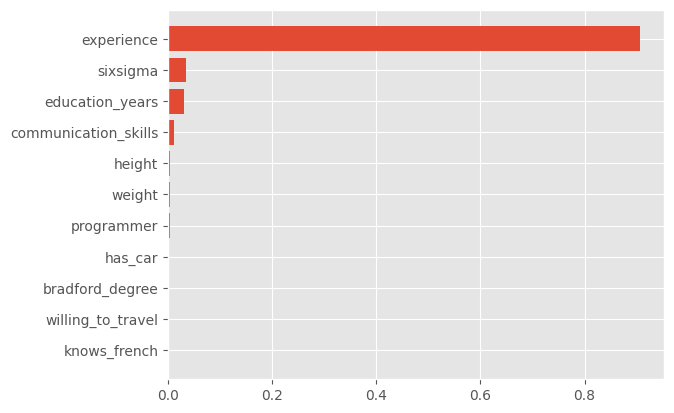

In [ ]:
plt.barh(keys, values)

0.9542197373010681
871.3439417725132


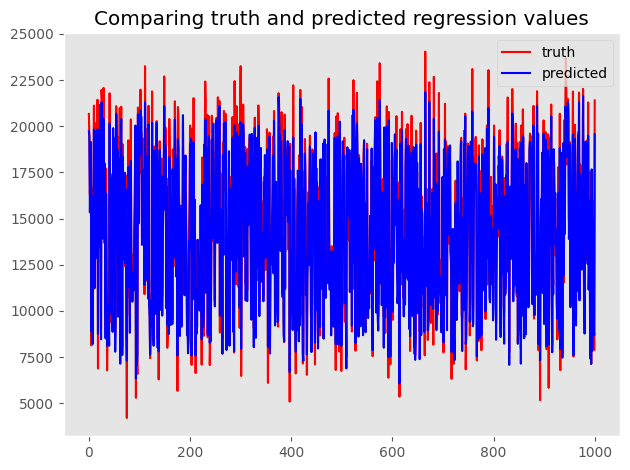

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

In [ ]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)

R-sqaured: 0.9998635315922108
Mean Absolute Error: 558.5172908146541

Feature Importances with XGBoost:
0.8661406 experience
0.030073691 sixsigma
0.03003925 education_years
0.017816778 communication_skills
0.01738974 programmer
0.015376458 has_car
0.013103592 bradford_degree
0.005750139 willing_to_travel
0.002790161 knows_french
0.0007957279 height
0.00072376017 weight


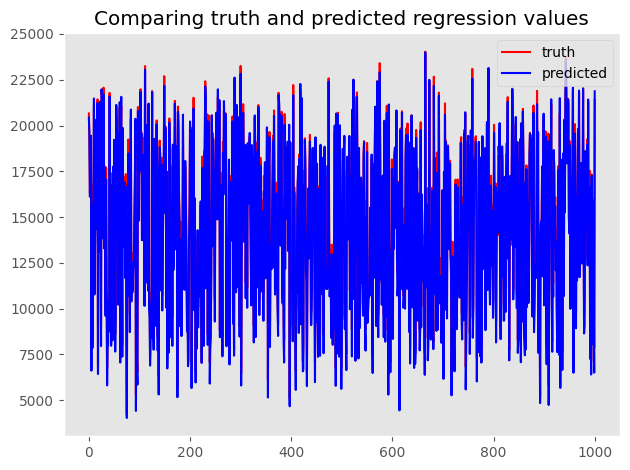

In [ ]:
make_plot(test_Y, xgb_predicted)

Text(0.5, 1.0, 'MAE for various regression algorithms')

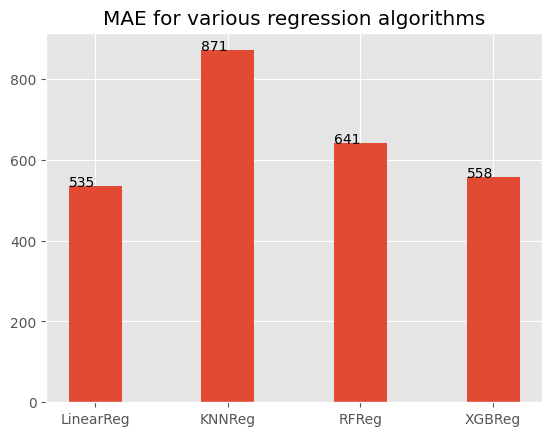

In [ ]:
# Let's plot the mean absolute error of all the algorithms we have tried
lin_mae = mean_absolute_error(test_Y, predicted)
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [lin_mae, knn_mae, rf_mae, xgb_mae]
labels = ["LinearReg", "KNNReg", "RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")